### Metrics to check the quality of Machine Learning Models

In [26]:
import  numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score,confusion_matrix ,classification_report,f1_score,accuracy_score



In [16]:
df=pd.read_csv('creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
26293,33991.0,1.184000,0.077313,-0.055352,0.346602,0.064687,-0.315344,0.198628,-0.051630,-0.264181,...,-0.475572,-1.581228,0.102774,-0.545289,0.154151,-0.097516,-0.058217,0.008137,54.32,0
211311,138357.0,-0.076699,0.937671,-0.397708,-0.607977,1.011812,-0.769336,1.088108,-0.241793,0.435489,...,-0.438086,-0.879881,0.169345,0.469040,-0.415375,0.102498,0.177121,-0.091900,8.93,0
50239,44404.0,0.985425,-0.543453,-0.015695,-0.120421,-0.559245,-0.613861,0.070078,-0.107929,0.045003,...,0.134754,0.032003,-0.232465,0.079921,0.324282,1.090722,-0.122228,0.012500,157.29,0
59554,48891.0,1.026195,-1.049604,-0.392338,-0.707549,-0.688974,-0.495849,0.013860,-0.157597,-1.259671,...,-0.682208,-2.073581,0.021147,-0.387059,-0.040633,0.632635,-0.122532,0.025064,209.85,0
242779,151644.0,-1.396369,0.287581,-0.714451,-0.434814,1.099719,-1.250225,0.575067,0.248665,-0.496608,...,0.413239,0.972539,-0.118448,-0.400185,-0.087721,-0.207995,-0.057105,0.100508,51.91,0


In [3]:
df.shape

(284807, 31)

In [17]:
X =df.drop(columns =['Class','Time','Amount'])

In [18]:
y=df.iloc[:,-1:]

In [19]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
y.sum()

Class    492
dtype: int64

In [8]:
lr=LogisticRegression(class_weight={0:1,1:2})

In [9]:
lr.fit(X,y)

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight={0: 1, 1: 2})

In [11]:
predicted_y =lr.predict(X)

In [12]:
predicted_y.sum()

437

In [13]:
grid=GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'class_weight':[{0:1,1: number}for number in range(1,10)]},
    cv=5
)

In [14]:
grid.fit(X,y)

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}, {0: 1, 1: 8},
                                          {0: 1, 1: 9}]})

In [41]:
predicted_y =grid.predict(X)

In [42]:
predicted_y.sum()

476

In [43]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.423369,1.278687,0.026998,0.006102,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.998999,0.999315,0.998947,0.999298,0.999017,0.999115,0.000158,9
1,4.669507,0.335458,0.021911,0.004076,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.999034,0.999421,0.999017,0.999298,0.999175,0.999189,0.000154,7
2,4.495684,0.455751,0.023196,0.019531,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.999052,0.999491,0.998964,0.999421,0.999210,0.999228,0.000204,4
3,4.092469,0.252036,0.016998,0.003099,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.998999,0.999544,0.998982,0.999438,0.999280,0.999249,0.000227,1
4,4.598553,0.492845,0.022601,0.008427,"{0: 1, 1: 5}","{'class_weight': {0: 1, 1: 5}}",0.998964,0.999526,0.999017,0.999438,0.999280,0.999245,0.000223,3
5,4.309118,0.366824,0.020400,0.004544,"{0: 1, 1: 6}","{'class_weight': {0: 1, 1: 6}}",0.998964,0.999579,0.998982,0.999438,0.999280,0.999249,0.000244,1
6,4.577030,0.424035,0.023402,0.004762,"{0: 1, 1: 7}","{'class_weight': {0: 1, 1: 7}}",0.998964,0.999596,0.998912,0.999473,0.999192,0.999228,0.000271,5
7,4.176767,0.299742,0.019601,0.003877,"{0: 1, 1: 8}","{'class_weight': {0: 1, 1: 8}}",0.998929,0.999649,0.998841,0.999438,0.999192,0.999210,0.000303,6
8,4.592731,0.343156,0.021813,0.003719,"{0: 1, 1: 9}","{'class_weight': {0: 1, 1: 9}}",0.998894,0.999649,0.998718,0.999368,0.999192,0.999164,0.000331,8


In [22]:
precision_score(y,predicted_y)

0.8283752860411899

In [23]:
recall_score(y,predicted_y)

0.7357723577235772

In [25]:
f1_score(y,predicted_y)

0.7793326157158235

In [27]:
accuracy_score(y,predicted_y)

0.999280214320575

In [28]:
confusion_matrix(y,predicted_y)

array([[284240,     75],
       [   130,    362]], dtype=int64)

<AxesSubplot:>

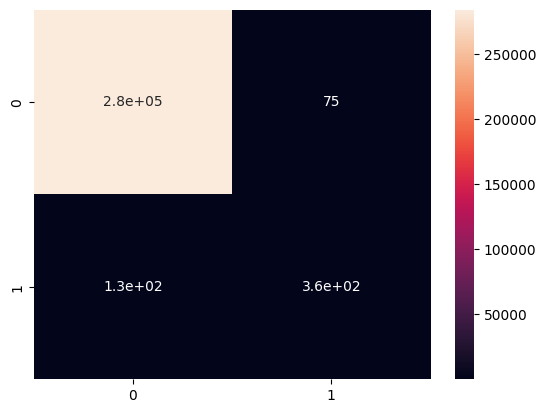

In [29]:
sns.heatmap(confusion_matrix(y,predicted_y),annot=True)